# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import sys
sys.path.append("Lesson05/scripts")
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

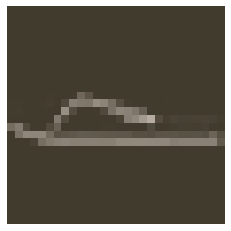

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [3]:
# Import the modules
from torch import nn

# Number of pixels input
inputs  = 784
# Number of output classes
outputs = 10
# Number of nodes in each hidden layer
nodes   = [128, 64, outputs]

# Define the input layer
layers = [('fc1', nn.Linear(inputs, nodes[0])),
          ('relu1',nn.ReLU())]

# Loop over hidden layers. Note that putting this in
# a for-loop allows me to experiment with different 
# numbers of layers without having to modify the network.
# I just have to add/subtract entries to the 'nodes' 
# array, or change the number of nodes in a given layer.
for i,n in enumerate(nodes[:-1]):
    # Add the layer
    name  = 'fc' + str(i+2)
    layer = nn.Linear(nodes[i], nodes[i+1])
    layers.append((name, layer))

    # Add the activation
    name  = 'activ' + str(i+2)
    layers.append((name, nn.ReLU()))

# Modify the final activation to be LogSoftmax
layers[-1] = ('acitv_fin', nn.LogSoftmax(dim=1))

# Put it into the sequential model
from collections import OrderedDict
model = nn.Sequential(OrderedDict(layers))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (activ2): ReLU()
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (acitv_fin): LogSoftmax()
)

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [4]:
# Criterion
criterion = nn.NLLLoss()

# Optimizer
from torch import optim
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [5]:
# Training loop
epochs = 5

# Keep track of the loss, we'll plot it when we're done
running_loss    = [0]*epochs

# Loop on the epochs
for e in range(epochs):
    
    for images, labels in trainloader:
        # Flatten
        images = images.view(images.shape[0], -1)

        # Clear the gradients
        optimizer.zero_grad()
        
        # Forward pass
        output = model(images)

        # Compute the loss
        loss = criterion(output, labels)

        # Backpropagate
        loss.backward()

        # Iterate the optimizer
        optimizer.step()

        running_loss[e] += loss.item()
    
    # Print the loss
    running_loss[e] /= len(trainloader)
    print(f"Training loss ({e+1}): {running_loss[e]}")

Training loss (1): 1.0054448524644888
Training loss (2): 0.5630527393840777
Training loss (3): 0.49348154282773227
Training loss (4): 0.45906258242597964
Training loss (5): 0.43690287348812323


tensor([[4.8375e-09, 1.5758e-13, 4.2228e-08, 1.5516e-07, 3.8315e-08, 1.1286e-07,
         5.1260e-09, 6.5502e-12, 9.9124e-01, 2.1369e-12]],
       grad_fn=<PowBackward2>)


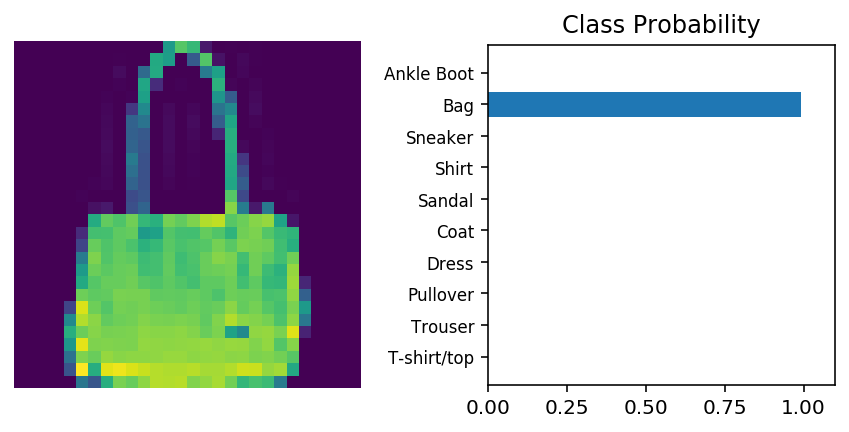

In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.pow(10,model(img))
print(ps)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')